# Testing new mean error calculations

## Setup

### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
import pandas as pd
import pickle
import sys
from tqdm import tqdm

sys.path.append('../../../stationsim/')

from ensemble_kalman_filter import EnsembleKalmanFilter, EnsembleKalmanFilterType, AgentIncluder
from stationsim_gcs_model import Model

sys.path.append('../')

from experiment_utils import Modeller, Processor, Visualiser

%matplotlib inline

### Functions

In [2]:
def __make_exit_observation_operator(population_size):
    a = np.identity(2 * population_size)
    b = np.zeros(shape=(2 * population_size, population_size))
    return np.hstack((a, b))


def __make_observation_operator(population_size, mode):
    if mode == EnsembleKalmanFilterType.STATE:
        return np.identity(2 * population_size)
    elif mode == EnsembleKalmanFilterType.DUAL_EXIT:
        return __make_exit_observation_operator(population_size)
    else:
        raise ValueError(f'Unexpected filter mode: {mode}')

        
def __make_state_vector_length(population_size, mode):
    if mode == EnsembleKalmanFilterType.STATE:
        return 2 * population_size
    elif mode == EnsembleKalmanFilterType.DUAL_EXIT:
        return 3 * population_size
    else:
        raise ValueError(f'Unexpected filter mode: {mode}')

        
def run_enkf(filter_params, model_params, inclusion, station, pickle_path, filter_id):
    # Set up filter params
    filter_params['inclusion'] = inclusion
    model_params['station'] = station
    
    enkf = EnsembleKalmanFilter(Model, filter_params, model_params,
                                filtering=True, benchmarking=True)
    
    while enkf.active:
        enkf.step()
    norm = inclusion.name if inclusion is not None else 'default'
    mt = station if station is not None else 'toy'
    
    
    s = pickle_path + f'filter_{mt}_{norm}_{filter_id}.pkl'
    
    with open(s, 'wb') as f:
        pickle.dump(enkf, f)

### Constants and default parameter values

In [3]:
ensemble_size = 20
pop_size = 20
assimilation_period = 20
obs_noise_std = 1.0
mode = EnsembleKalmanFilterType.STATE
its = 20000

model_params = {'pop_total': pop_size,
                'do_print': False}

# Set up filter parameters
observation_operator = __make_observation_operator(pop_size, mode)
state_vec_length = __make_state_vector_length(pop_size, mode)
data_mode = EnsembleKalmanFilterType.STATE
data_vec_length = __make_state_vector_length(pop_size, data_mode)

filter_params = {'max_iterations': its,
                 'assimilation_period': assimilation_period,
                 'ensemble_size': ensemble_size,
                 'population_size': pop_size,
                 'vanilla_ensemble_size': ensemble_size,
                 'state_vector_length': state_vec_length,
                 'data_vector_length': data_vec_length,
                 'mode': mode,
                 'H': observation_operator,
                 'R_vector': obs_noise_std * np.ones(data_vec_length),
                 'keep_results': True,
                 'run_vanilla': True,
                 'vis': False}

In [4]:
inclusions = (None,
              AgentIncluder.BASE,
              AgentIncluder.MODE_EN)

In [5]:
stations = (None, 'Grand_Central')

In [6]:
pickle_path = '../results/models/gcs_model/inc/'

## Run filters

Make list of parameter combos to be provided to function:

In [7]:
param_combos = list()

for inclusion in inclusions:
    for station in stations:
        for i in range(10):
            x = (filter_params, model_params, inclusion, station, pickle_path, i)
            param_combos.append(x)

In [8]:
for pc in tqdm(param_combos):
    print(pc[2], pc[3])
    run_enkf(*pc)

  0%|          | 0/60 [00:00<?, ?it/s]../../../stationsim/ensemble_kalman_filter.py:170: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)


None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  2%|▏         | 1/60 [01:05<1:04:10, 65.27s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  3%|▎         | 2/60 [01:59<56:34, 58.53s/it]  

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  5%|▌         | 3/60 [03:06<59:21, 62.47s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  7%|▋         | 4/60 [04:03<56:32, 60.59s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  8%|▊         | 5/60 [05:06<56:15, 61.37s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 10%|█         | 6/60 [06:04<54:15, 60.29s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 12%|█▏        | 7/60 [06:48<48:34, 54.99s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 13%|█▎        | 8/60 [07:38<46:12, 53.31s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 15%|█▌        | 9/60 [08:29<44:42, 52.59s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 17%|█▋        | 10/60 [09:30<45:50, 55.01s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 18%|█▊        | 11/60 [11:30<1:01:22, 75.15s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 20%|██        | 12/60 [13:18<1:07:59, 84.99s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 22%|██▏       | 13/60 [15:07<1:12:20, 92.36s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 23%|██▎       | 14/60 [16:37<1:10:16, 91.67s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 25%|██▌       | 15/60 [18:36<1:14:47, 99.73s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 27%|██▋       | 16/60 [20:07<1:11:11, 97.07s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 28%|██▊       | 17/60 [23:54<1:37:36, 136.21s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 30%|███       | 18/60 [25:13<1:23:24, 119.15s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 32%|███▏      | 19/60 [26:50<1:16:47, 112.39s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 33%|███▎      | 20/60 [29:01<1:18:34, 117.87s/it]/home/keiran/miniconda3/envs/dust/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/keiran/miniconda3/envs/dust/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 35%|███▌      | 21/60 [29:58<1:04:52, 99.81s/it] 

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 37%|███▋      | 22/60 [30:46<53:18, 84.17s/it]  

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 38%|███▊      | 23/60 [32:00<50:00, 81.09s/it]

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 40%|████      | 24/60 [33:06<45:56, 76.56s/it]

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 42%|████▏     | 25/60 [34:01<40:50, 70.02s/it]

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 43%|████▎     | 26/60 [34:44<35:09, 62.05s/it]

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 45%|████▌     | 27/60 [35:38<32:49, 59.69s/it]

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 47%|████▋     | 28/60 [36:40<32:12, 60.40s/it]

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 48%|████▊     | 29/60 [37:55<33:23, 64.63s/it]

AgentIncluder.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 50%|█████     | 30/60 [38:51<31:01, 62.03s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 52%|█████▏    | 31/60 [40:48<37:59, 78.59s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 53%|█████▎    | 32/60 [42:52<42:57, 92.06s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 55%|█████▌    | 33/60 [45:14<48:13, 107.17s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 57%|█████▋    | 34/60 [46:54<45:33, 105.15s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 58%|█████▊    | 35/60 [49:18<48:33, 116.55s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 60%|██████    | 36/60 [51:32<48:44, 121.87s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 62%|██████▏   | 37/60 [53:54<48:59, 127.81s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 63%|██████▎   | 38/60 [55:55<46:08, 125.86s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 65%|██████▌   | 39/60 [57:52<43:11, 123.40s/it]

AgentIncluder.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 67%|██████▋   | 40/60 [59:44<39:54, 119.72s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 68%|██████▊   | 41/60 [1:00:29<30:52, 97.49s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 70%|███████   | 42/60 [1:01:33<26:14, 87.48s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 72%|███████▏  | 43/60 [1:02:44<23:22, 82.52s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 73%|███████▎  | 44/60 [1:04:19<23:01, 86.31s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 75%|███████▌  | 45/60 [1:05:32<20:34, 82.30s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 77%|███████▋  | 46/60 [1:07:10<20:15, 86.80s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 78%|███████▊  | 47/60 [1:08:17<17:34, 81.09s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 80%|████████  | 48/60 [1:09:23<15:15, 76.29s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 82%|████████▏ | 49/60 [1:10:41<14:06, 76.92s/it]

AgentIncluder.MODE_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 83%|████████▎ | 50/60 [1:12:10<13:25, 80.53s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 85%|████████▌ | 51/60 [1:14:51<15:43, 104.81s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 87%|████████▋ | 52/60 [1:17:49<16:54, 126.76s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 88%|████████▊ | 53/60 [1:20:51<16:41, 143.09s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 90%|█████████ | 54/60 [1:23:21<14:31, 145.20s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 92%|█████████▏| 55/60 [1:26:34<13:17, 159.59s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 93%|█████████▎| 56/60 [1:29:16<10:41, 160.29s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 95%|█████████▌| 57/60 [1:33:09<09:06, 182.14s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 97%|█████████▋| 58/60 [1:42:48<10:02, 301.12s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 98%|█████████▊| 59/60 [1:45:07<04:12, 252.50s/it]

AgentIncluder.MODE_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


100%|██████████| 60/60 [1:47:58<00:00, 107.97s/it]


## Data Processing

### Read in Data

In [9]:
pickle_file_paths = [p for p in listdir(pickle_path) if p.endswith('.pkl')]

In [10]:
results = list()

for filter_pickle in pickle_file_paths:
    x = pickle_path + filter_pickle
    with open(x, 'rb') as f:
        enkf = pickle.load(f)
    
    inclusion = enkf.inclusion
    inclusion_name = 'default' if inclusion is None else inclusion.name
    station_name = enkf.base_model.station

    metrics = pd.DataFrame(enkf.metrics)
    metrics['inclusion'] = inclusion_name
    metrics['station'] = station_name
    results.append(metrics)

In [11]:
results = pd.concat(results)
results.head()

,time,forecast,obs,analysis,baseline,inclusion,station
0,0,0.000000,1.083306,0.000000,0.000000,default,None
1,20,0.421194,1.293530,0.059655,0.486728,default,None
2,40,0.484364,1.157866,0.178618,0.949895,default,None
3,60,0.170656,1.371030,0.101075,0.944251,default,None
4,80,0.468800,1.379799,0.144403,1.358272,default,None


In [14]:
error_types = ['forecast', 'obs', 'analysis', 'baseline']

In [15]:
output = list()

for i, row in results.iterrows():
    for et in error_types:
        d = {'time': row['time'],
             'inclusion': row['inclusion'],
             'station': row['station'],
             'variable':  et,
             'value': row[et]}
        output.append(d)

tidy_df = pd.DataFrame(output)
tidy_df.head()

,time,inclusion,station,variable,value
0,0,default,None,forecast,0.000000
1,0,default,None,obs,1.083306
2,0,default,None,analysis,0.000000
3,0,default,None,baseline,0.000000
4,20,default,None,forecast,0.421194


In [16]:
tidy_df['station'].unique()

array([None, 'Grand_Central'], dtype=object)

### Toy Model

In [17]:
df = tidy_df.loc[tidy_df['station'].isnull(), :]

### Visualising error by inclusion type for different error metrics

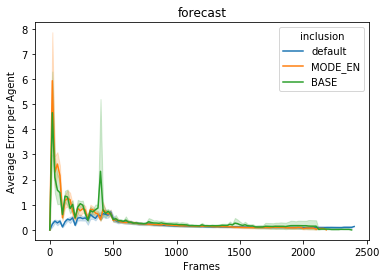

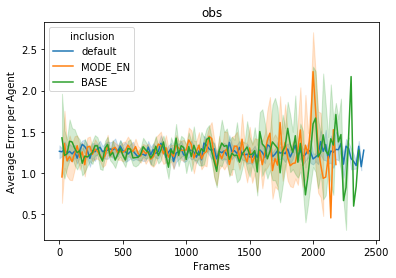

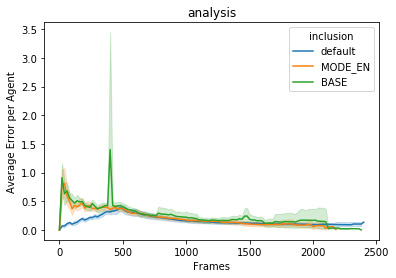

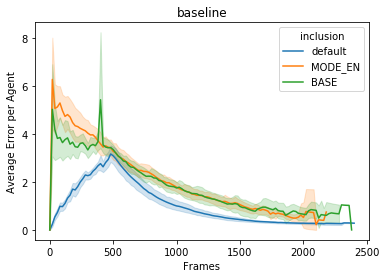

In [18]:
for var in df['variable'].unique():
    tdf = df.loc[df['variable']==var, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='inclusion')
    plt.title(var)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.show()

### Visualising error by error metric for different normalisation types

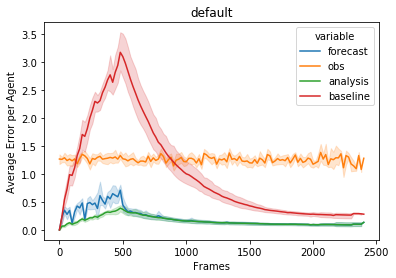

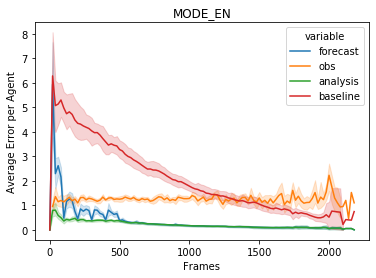

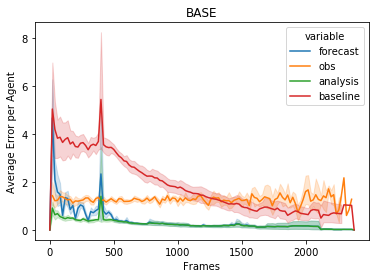

In [19]:
for n in df['inclusion'].unique():
    tdf = df.loc[df['inclusion']==n, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='variable')
    plt.title(n)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.show()

### GCS

In [20]:
df = tidy_df.loc[tidy_df['station']=='Grand_Central', :]

### Visualising error by normalisation type for different error metrics

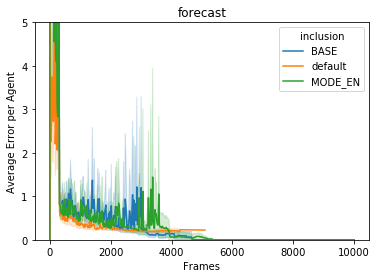

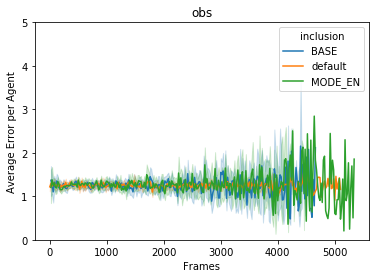

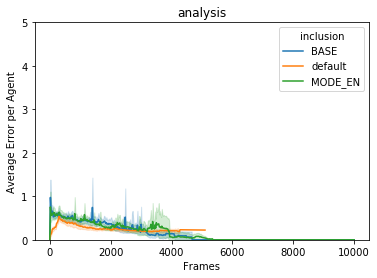

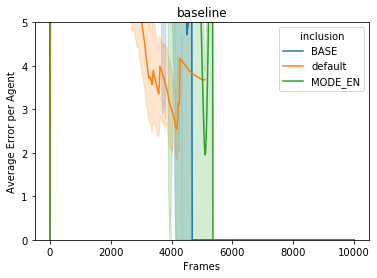

In [23]:
for var in df['variable'].unique():
    tdf = df.loc[df['variable']==var, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='inclusion')
    plt.title(var)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.ylim((0, 5))
    plt.show()

### Visualising error by error metric for different normalisation types

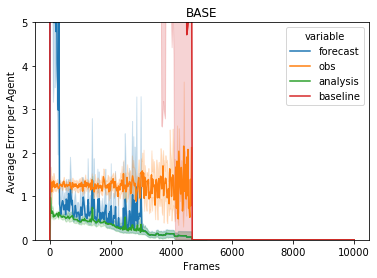

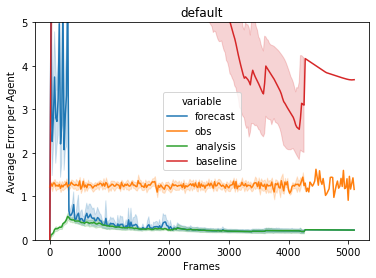

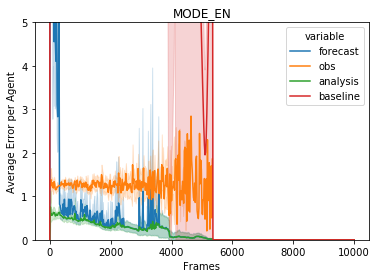

In [24]:
for n in df['inclusion'].unique():
    tdf = df.loc[df['inclusion']==n, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='variable')
    plt.title(n)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.ylim((0, 5))
    plt.show()